In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [5]:
btc = pd.read_csv("BTC_USD_2013-10-01_2020-01-12-CoinDesk.csv")
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,01-01-2017,964.32500,952.45500,968.48500,949.08625
1,BTC,02-01-2017,1009.97375,964.32500,1011.52500,963.53000
2,BTC,03-01-2017,1028.33375,1009.97375,1034.10500,998.62125
3,BTC,04-01-2017,1047.09999,1028.33375,1048.12375,1013.37750
4,BTC,05-01-2017,1140.38500,1047.09999,1141.99750,1047.06375


In [6]:
btc.shape

(1102, 6)

In [317]:
btc_price = btc[["Date","Closing Price (USD)"]]
btc_price.head()

,Date,Closing Price (USD)
0,01-01-2017,964.32500
1,02-01-2017,1009.97375
2,03-01-2017,1028.33375
3,04-01-2017,1047.09999
4,05-01-2017,1140.38500


In [318]:
btc_price.tail()

,Date,Closing Price (USD)
1091,08-01-2020,8039.603701
1092,09-01-2020,8067.606369
1093,10-01-2020,7808.701364
1094,11-01-2020,8087.452885
1095,12-01-2020,8078.993532


In [319]:
btc_price["Date"] = pd.to_datetime(btc_price["Date"],format='%d-%m-%Y',infer_datetime_format=True)
btc_price = btc_price.set_index("Date")
btc_price.columns=["Price"]

In [320]:
btc_price.isna().sum()

Price    0
dtype: int64

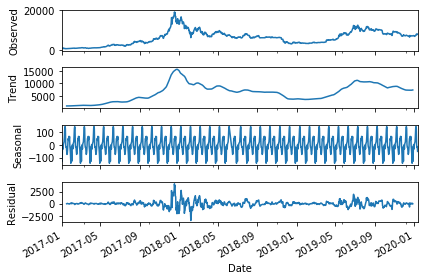

In [350]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(btc_price,model ="additive",freq=30)
fig = decomposition.plot()
plt.show()

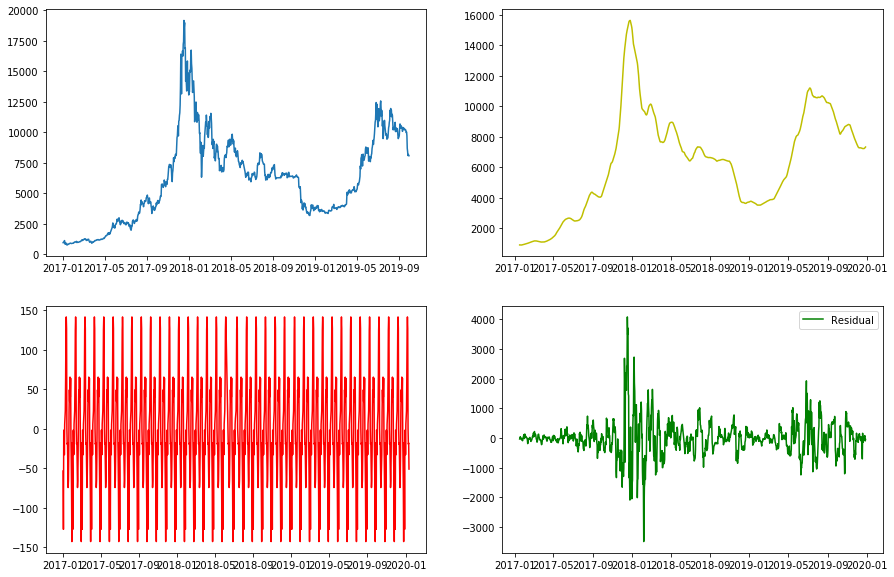

In [351]:
plt.figure(figsize=(15,10))
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(train,label="Original")
plt.subplot(222)
plt.plot(trend,label="Trend",color='y')
plt.subplot(223)
plt.plot(seasonality,label="Seasonality",color='r')
plt.subplot(224)
plt.plot(residual,label="Residual",color='g')

plt.legend()
plt.show()

In [321]:
train = btc_price[0:993]
test = btc_price[993:]

In [322]:
train.isna().sum()

Price    0
dtype: int64

In [323]:
train.head()

,Price
Date,
2017-01-01,964.32500
2017-01-02,1009.97375
2017-01-03,1028.33375
2017-01-04,1047.09999
2017-01-05,1140.38500


In [324]:
test.head()

,Price
Date,
2019-10-01,8241.341470
2019-10-02,8333.689190
2019-10-03,8273.464018
2019-10-04,8203.843833
2019-10-05,8163.902638


In [326]:
#train = train.resample('D').mean() 

In [327]:
train.isna().sum()

Price    0
dtype: int64

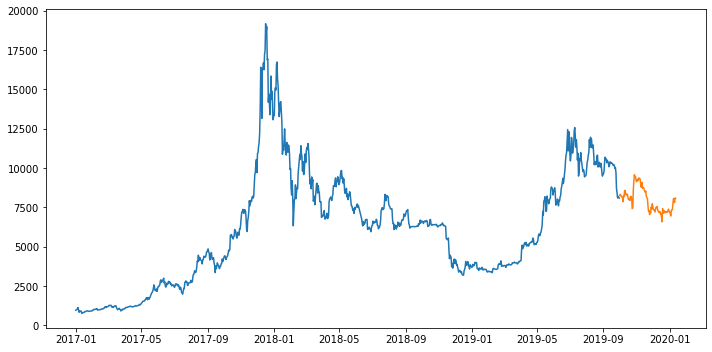

In [328]:
plt.figure(figsize=(10,5))
plt.plot(train.Price)
plt.plot(test.Price)
plt.tight_layout()

###### NAIVE APPROACH
   - In this forecasting technique, the value of the new data point is predicted to be equal to the previous data point.  
   - The result would be a flat line, since all new values take the previous values.

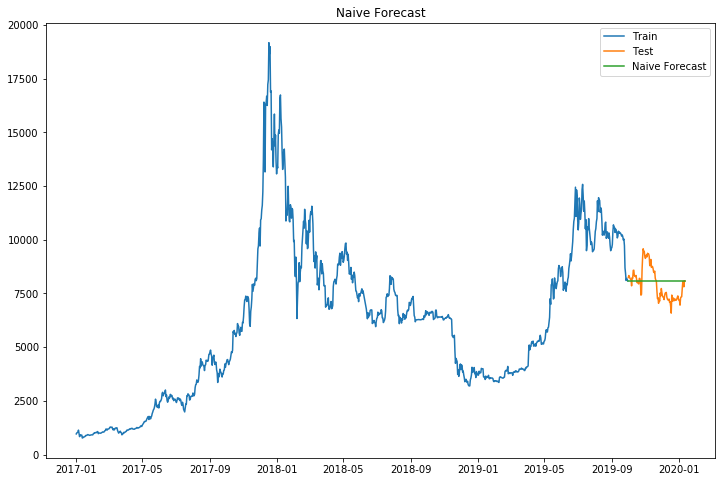

In [329]:
dd= np.asarray(train.Price)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index,test['Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [330]:
y_hat.head()

,Price,naive
Date,,
2019-10-01,8241.341470,8085.71329
2019-10-02,8333.689190,8085.71329
2019-10-03,8273.464018,8085.71329
2019-10-04,8203.843833,8085.71329
2019-10-05,8163.902638,8085.71329


In [331]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test.Price, y_hat.naive))
print(rmse)

753.2239038881894


###### SIMPLE AVERAGE
- The next value is taken as the average of all the previous values.
- The predictions here are better than the ‘Naive Approach’ as it doesn’t result in a flat line but here, all the past values are taken into consideration which might not always be useful. 

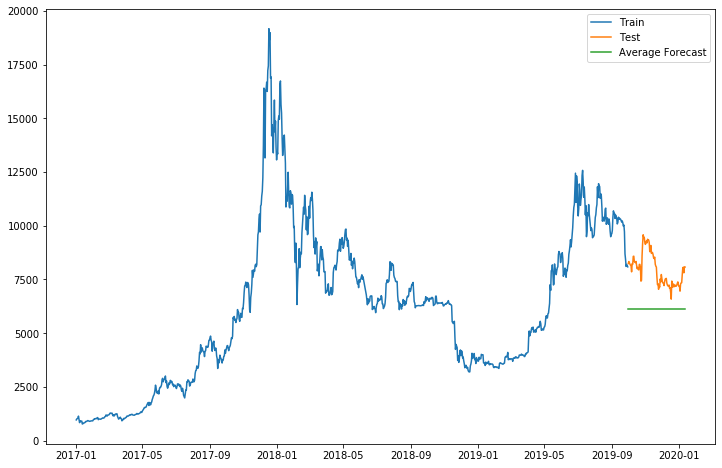

In [332]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [333]:
rms = sqrt(mean_squared_error(test.Price, y_hat_avg.avg_forecast))
print(rms)

RMSE = 109.545990803

1973.644889392358


###### MOVING AVERAGE

<Figure size 720x360 with 0 Axes>

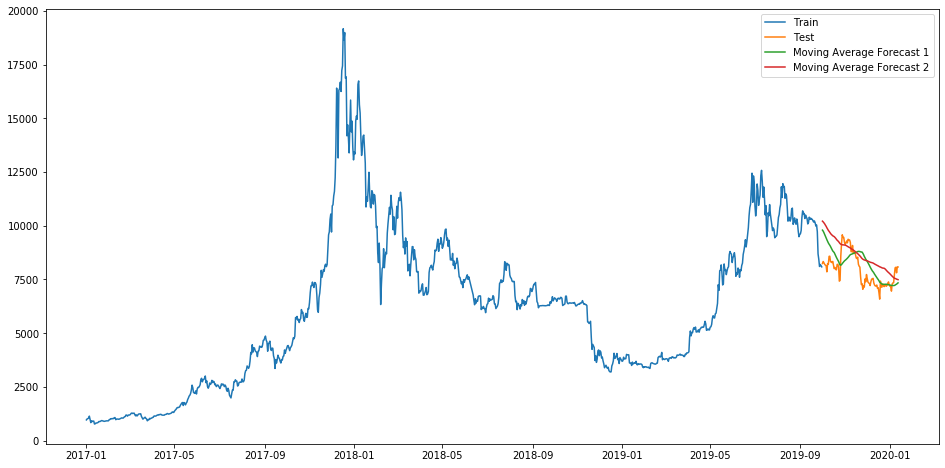

In [358]:
plt.figure(figsize=(10,5))
#rolling_mean=btc_price
rolling_mean= btc_price["Price"].rolling(30).mean()
rolling_mean1= btc_price["Price"].rolling(60).mean()
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(rolling_mean[993:], label='Moving Average Forecast 1')
plt.plot(rolling_mean1[993:], label='Moving Average Forecast 2')
plt.legend(loc='best')

In [336]:
rms = sqrt(mean_squared_error(test.Price, rolling_mean[993:]))
print(rms)

757.853996303872


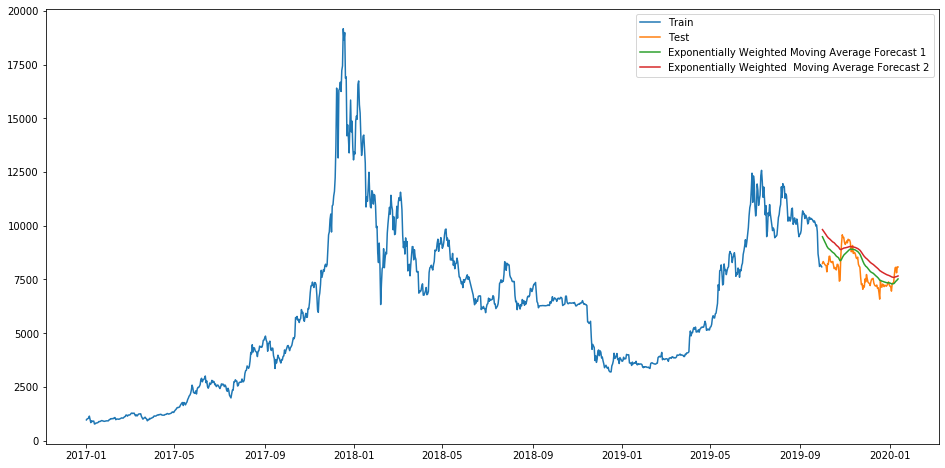

In [361]:
exp1 = btc_price["Price"].ewm(span=30, adjust=False).mean()
exp2 =btc_price["Price"].ewm(span=60, adjust=False).mean()
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(exp1[993:], label='Exponentially Weighted Moving Average Forecast 1')
plt.plot(exp2[993:], label='Exponentially Weighted  Moving Average Forecast 2')
plt.legend(loc='best')

In [362]:
rms = sqrt(mean_squared_error(test.Price, exp1[993:]))
print(rms)

604.7521997568145


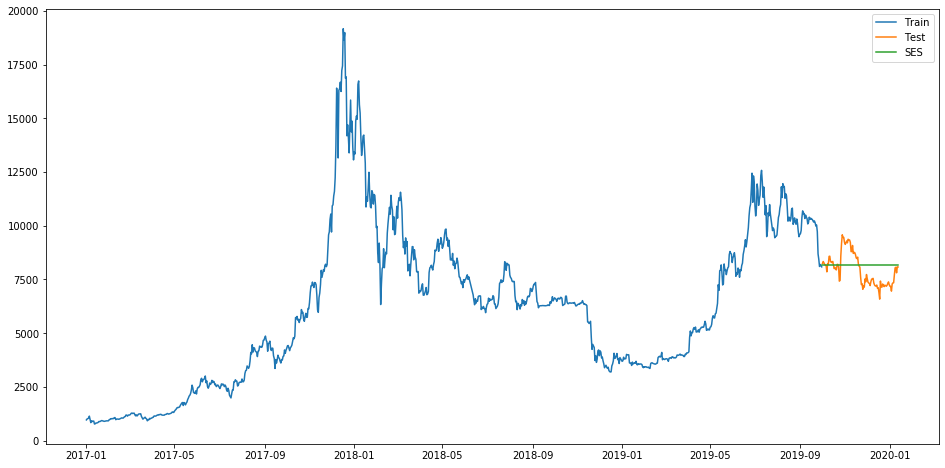

In [370]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Price'])).fit(smoothing_level=0.5,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [364]:
rms = sqrt(mean_squared_error(test.Price, y_hat_avg.SES))
print(rms)

RMSE = 43.3576252252

762.0842076128228


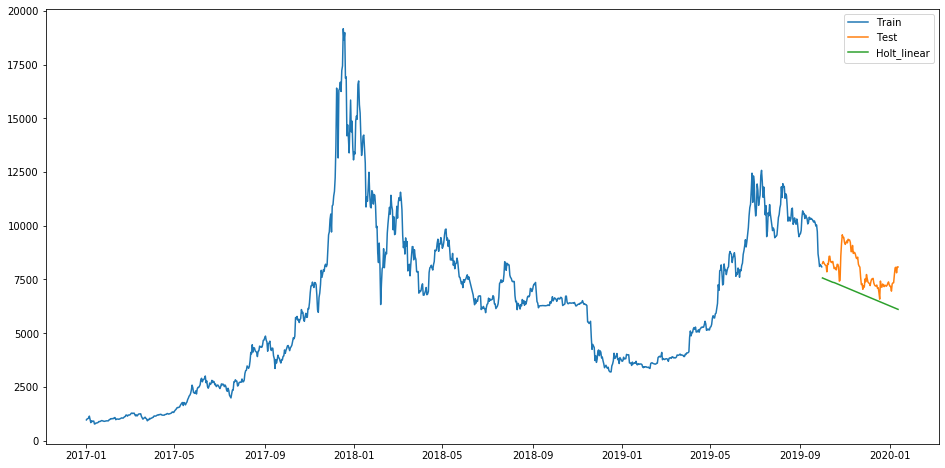

In [380]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.93)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

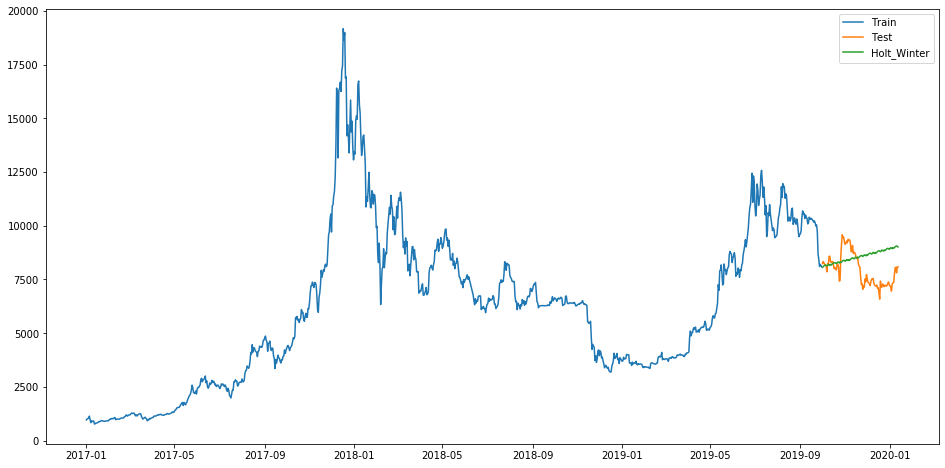

In [392]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12,trend='additive', seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=14655.559, BIC=14694.757, Fit time=6.994 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14651.825, BIC=14661.624, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=14650.916, BIC=14670.515, Fit time=0.528 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=14650.948, BIC=14670.547, Fit time=0.551 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14649.450, BIC=14664.149, Fit time=0.095 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=14650.809, BIC=14670.408, Fit time=0.473 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=14651.608, BIC=14676.107, Fit time=1.677 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14651.291, BIC=14670.890, Fit time=0.130 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=14651.368, BIC=14670.967, Fit time=0.133 seconds
Fit ARIMA:

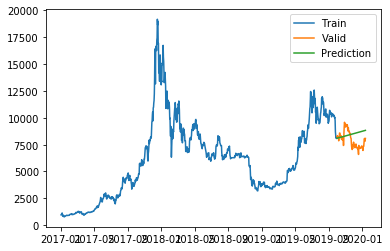

Optimized value for order: (1, 1, 0)
Optimized value for order: (0, 0, 0, 12)


In [393]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,stepwise=True,
                    m=12,n_fits=30)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Price'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()
print("Optimized value for order: {}".format(model.order))
print("Optimized value for order: {}".format(model.seasonal_order))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [399]:
train.shape[0]

993

In [411]:
dataset = btc_price.reset_index()

In [414]:
dataset = dataset[["Price"]].values
dataset = dataset.astype('float32')

In [416]:
dataset

array([[ 964.325  ],
       [1009.97375],
       [1028.3337 ],
       ...,
       [7808.701  ],
       [8087.453  ],
       [8078.9937 ]], dtype=float32)

In [417]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [418]:
dataset

array([[0.01041973],
       [0.01290141],
       [0.01389954],
       ...,
       [0.38251162],
       [0.39766586],
       [0.397206  ]], dtype=float32)

In [419]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

734 362


In [420]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [421]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [422]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
LSTM

In [424]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0575
Epoch 2/100
 - 0s - loss: 0.0366
Epoch 3/100
 - 0s - loss: 0.0212
Epoch 4/100
 - 0s - loss: 0.0119
Epoch 5/100
 - 0s - loss: 0.0069
Epoch 6/100
 - 0s - loss: 0.0048
Epoch 7/100
 - 0s - loss: 0.0040
Epoch 8/100
 - 0s - loss: 0.0036
Epoch 9/100
 - 0s - loss: 0.0033
Epoch 10/100
 - 0s - loss: 0.0030
Epoch 11/100
 - 0s - loss: 0.0027
Epoch 12/100
 - 0s - loss: 0.0025
Epoch 13/100
 - 0s - loss: 0.0023
Epoch 14/100
 - 0s - loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0020
Epoch 16/100
 - 0s - loss: 0.0019
Epoch 17/100
 - 0s - loss: 0.0018
Epoch 18/100
 - 0s - loss: 0.0017
Epoch 19/100
 - 0s - loss: 0.0016
Epoch 20/100
 - 0s - loss: 0.0016
Epoch 21/100
 - 0s - loss: 0.0016
Epoch 22/100
 - 0s - loss: 0.0015
Epoch 23/100
 - 0s - loss: 0.0015
Epoch 24/100
 - 0s - loss: 0.0015
Epoch 25/100
 - 0s - loss: 0.0015
Epoch 26/100
 - 0s - loss: 0.0015
Epoch 27/100
 - 0s - loss: 0.0015
Epoch 28/100
 - 0s - loss: 0.0014
Epoch 29/100
 - 0s - loss: 0.0014
Epoch 30/100
 - 0s - lo

In [425]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [426]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [427]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 537.96 RMSE
Test Score: 433.24 RMSE


In [428]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

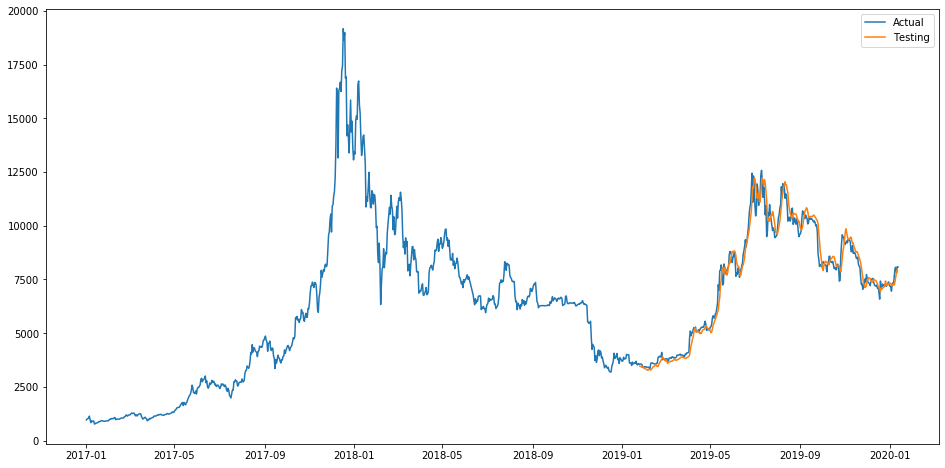

In [433]:
plt.figure(figsize=(16,8))
plt.plot(btc_price['Price'], label='Actual')
#plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=btc_price.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=btc_price.index).close, label='Testing')
plt.legend(loc='best')
plt.show()